In the first phase we should import our dataset

In [2]:
import tensorflow as tf
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np

2023-09-10 15:51:57.492390: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-10 15:51:57.827104: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-10 15:51:57.828928: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-10 15:51:59.172802: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
from tensorflow.keras.datasets import mnist

Now we should consider variables for training and testing

In [4]:
x_train_path = "../dataset/train-images.idx3-ubyte"
y_train_path = "../dataset/train-labels.idx1-ubyte"
x_test_path = "../dataset/t10k-images.idx3-ubyte"
y_test_path = "../dataset/t10k-labels.idx1-ubyte"

In [5]:
import idx2numpy as idx2

In [6]:
x_train = idx2.convert_from_file(x_train_path)

In [7]:
x_train.shape

(60000, 28, 28)

In [8]:
y_train = idx2.convert_from_file(y_train_path)

In [9]:
y_train.shape

(60000,)

In [10]:
x_test = idx2.convert_from_file(x_test_path)
y_test = idx2.convert_from_file(y_test_path)

In [11]:
x_test.shape,y_test.shape

((10000, 28, 28), (10000,))

Now lets see what is the scaling of our images

In [12]:
x_train.min(),x_train.max()

(0, 255)

As we can see, for better performance,we should normalize our data, i mean pixels should be between 0 and 1

In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
scaler = MinMaxScaler()

# by default,min max scaler does not do this operation inplace


In [29]:
x_train = np.expand_dims(x_train,axis=-1)


In [31]:
x_test = np.expand_dims(x_test,axis=-1)

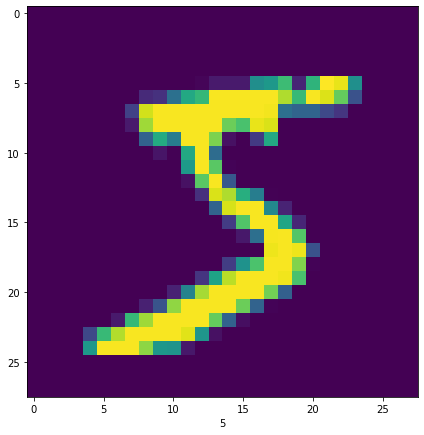

In [30]:
plt.figure(figsize=(7,10))
plt.xlabel(y_train[0])
plt.imshow(x_train[0])

In [44]:
import random

def show_random(x_data,y_data):

    # we call this function,for exploring our dataset,to see random images
    
    random_number = random.randint(0,len(x_data))
    
    plt.figure(figsize=(7,10))
    plt.axis(True)
    
    plt.imshow(x_data[random_number])
    plt.xlabel(y_data[random_number])
    

    

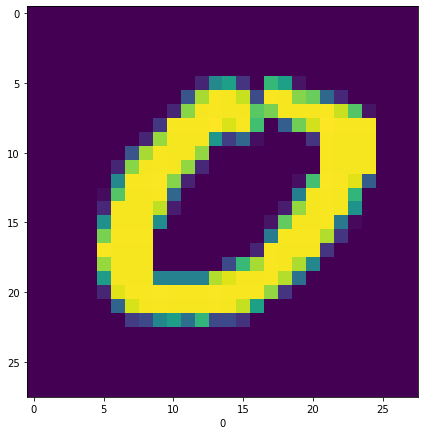

In [47]:
show_random(x_train,y_train)

now,i think we should rescal our dataset

In [89]:
#x_train = x_train*(1./255.)
x_test = x_test*(1./255.)


In [67]:
y_train = np.expand_dims(y_train,axis=-1)
y_test = np.expand_dims(y_test,axis=-1)

We should one hot encode our output

In [156]:
y_train_encoded = np.zeros(shape=(60000,10))
y_test_encoded = np.zeros(shape=(10000,10))



In [109]:
y_train

array([[5.],
       [0.],
       [4.],
       ...,
       [5.],
       [6.],
       [8.]])

In [110]:
x_test.mean()
y_train.shape

(60000, 1)

In [111]:
y_train.reshape((60000,))

array([5., 0., 4., ..., 5., 6., 8.])

In [112]:
y_train.shape

(60000, 1)

In [157]:
for i in range(len(y_train)-1):
    y_train_encoded[i][int(y_train[i])] = 1
    
for i in range(len(y_test)-1):
    y_test_encoded[i][int(y_test[i])] = 1

In [115]:
y_train[2]

array([4.])

In [117]:
y_train_encoded[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [140]:
model1 = tf.keras.Sequential()

model1.add(tf.keras.layers.Flatten())

model1.add(tf.keras.layers.Dense(8,activation=tf.keras.activations.relu))

model1.add(tf.keras.layers.Dense(8,activation=tf.keras.activations.relu))

model1.add(tf.keras.layers.Dense(10,activation=tf.keras.activations.softmax))

Now we should compile the model

In [141]:
model1.compile(loss=tf.keras.losses.categorical_crossentropy,
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
               metrics=[tf.keras.metrics.CategoricalAccuracy()])



now we should fit the model

for the first time,we just train it 100 times

In [142]:
model1.fit(x_train,y_train_encoded,
           epochs=50,
           batch_size=32,
           verbose=2)

Epoch 1/50
1875/1875 - 3s - loss: 0.5688 - categorical_accuracy: 0.8301 - 3s/epoch - 1ms/step
Epoch 2/50
1875/1875 - 2s - loss: 0.3223 - categorical_accuracy: 0.9079 - 2s/epoch - 963us/step
Epoch 3/50
1875/1875 - 2s - loss: 0.2898 - categorical_accuracy: 0.9167 - 2s/epoch - 959us/step
Epoch 4/50
1875/1875 - 2s - loss: 0.2738 - categorical_accuracy: 0.9215 - 2s/epoch - 955us/step
Epoch 5/50
1875/1875 - 2s - loss: 0.2630 - categorical_accuracy: 0.9241 - 2s/epoch - 960us/step
Epoch 6/50
1875/1875 - 2s - loss: 0.2546 - categorical_accuracy: 0.9270 - 2s/epoch - 959us/step
Epoch 7/50
1875/1875 - 2s - loss: 0.2490 - categorical_accuracy: 0.9286 - 2s/epoch - 944us/step
Epoch 8/50
1875/1875 - 2s - loss: 0.2428 - categorical_accuracy: 0.9294 - 2s/epoch - 977us/step
Epoch 9/50
1875/1875 - 2s - loss: 0.2391 - categorical_accuracy: 0.9305 - 2s/epoch - 945us/step
Epoch 10/50
1875/1875 - 2s - loss: 0.2339 - categorical_accuracy: 0.9330 - 2s/epoch - 939us/step
Epoch 11/50
1875/1875 - 2s - loss: 0.2311

In [143]:
model1.evaluate(x_test,y_test_encoded)

313/313 [==============================] - 0s 1ms/step - loss: 12.3391 - categorical_accuracy: 0.1009


[12.33906078338623, 0.10090000182390213]

it was fucking bad :((

A we can see,we have huge overfit,in our fucking dataset

In [144]:
model2 = tf.keras.Sequential()

model2.add(tf.keras.layers.Flatten())

model2.add(tf.keras.layers.Dense(4,activation=tf.keras.activations.relu))

model2.add(tf.keras.layers.Dense(4,activation=tf.keras.activations.relu))

model2.add(tf.keras.layers.Dense(10,activation=tf.keras.activations.softmax))

In [146]:
model2.compile(loss=tf.keras.losses.categorical_crossentropy,
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
               metrics=[tf.keras.metrics.CategoricalAccuracy()])


In [147]:
model2.fit(x_train,y_train_encoded,
           epochs=10,
           batch_size=32,
           verbose=2)

Epoch 1/10
1875/1875 - 2s - loss: 1.1944 - categorical_accuracy: 0.5959 - 2s/epoch - 1ms/step
Epoch 2/10
1875/1875 - 2s - loss: 0.7120 - categorical_accuracy: 0.7913 - 2s/epoch - 973us/step
Epoch 3/10
1875/1875 - 2s - loss: 0.6298 - categorical_accuracy: 0.8082 - 2s/epoch - 931us/step
Epoch 4/10
1875/1875 - 2s - loss: 0.5857 - categorical_accuracy: 0.8230 - 2s/epoch - 943us/step
Epoch 5/10
1875/1875 - 2s - loss: 0.5559 - categorical_accuracy: 0.8358 - 2s/epoch - 937us/step
Epoch 6/10
1875/1875 - 2s - loss: 0.5389 - categorical_accuracy: 0.8412 - 2s/epoch - 912us/step
Epoch 7/10
1875/1875 - 2s - loss: 0.5266 - categorical_accuracy: 0.8461 - 2s/epoch - 927us/step
Epoch 8/10
1875/1875 - 2s - loss: 0.5179 - categorical_accuracy: 0.8484 - 2s/epoch - 928us/step
Epoch 9/10
1875/1875 - 2s - loss: 0.5095 - categorical_accuracy: 0.8514 - 2s/epoch - 924us/step
Epoch 10/10
1875/1875 - 2s - loss: 0.5036 - categorical_accuracy: 0.8538 - 2s/epoch - 917us/step


In [149]:
model2.evaluate(x_test,y_test_encoded)

313/313 [==============================] - 0s 933us/step - loss: 9.1292 - categorical_accuracy: 0.1009


[9.129180908203125, 0.10090000182390213]

overfitting this huge,mean there must be some problem in our fucking dataset

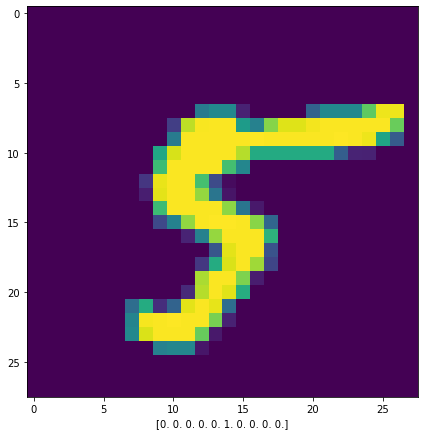

In [159]:
show_random(x_test,y_test_encoded)

I encode incorrectly

that was why it showed a huge awfullness in testing

lets train another model again

In [165]:
model3 = tf.keras.Sequential()

model3.add(tf.keras.layers.Flatten())

model3.add(tf.keras.layers.Dense(8,activation=tf.keras.activations.relu))

model3.add(tf.keras.layers.Dense(8,activation=tf.keras.activations.relu))

model3.add(tf.keras.layers.Dense(10,activation=tf.keras.activations.softmax))

In [166]:
model3.compile(loss=tf.keras.losses.categorical_crossentropy,
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
               metrics=[tf.keras.metrics.CategoricalAccuracy()])

In [167]:
model3.fit(x_train,y_train_encoded,
           epochs=70,
           batch_size=32,
           verbose=2)

Epoch 1/70
1875/1875 - 2s - loss: 0.7047 - categorical_accuracy: 0.7796 - 2s/epoch - 1ms/step
Epoch 2/70
1875/1875 - 2s - loss: 0.3591 - categorical_accuracy: 0.8965 - 2s/epoch - 934us/step
Epoch 3/70
1875/1875 - 2s - loss: 0.3148 - categorical_accuracy: 0.9079 - 2s/epoch - 940us/step
Epoch 4/70
1875/1875 - 2s - loss: 0.2937 - categorical_accuracy: 0.9146 - 2s/epoch - 925us/step
Epoch 5/70
1875/1875 - 2s - loss: 0.2757 - categorical_accuracy: 0.9202 - 2s/epoch - 931us/step
Epoch 6/70
1875/1875 - 2s - loss: 0.2622 - categorical_accuracy: 0.9236 - 2s/epoch - 921us/step
Epoch 7/70
1875/1875 - 2s - loss: 0.2529 - categorical_accuracy: 0.9269 - 2s/epoch - 928us/step
Epoch 8/70
1875/1875 - 2s - loss: 0.2456 - categorical_accuracy: 0.9295 - 2s/epoch - 919us/step
Epoch 9/70
1875/1875 - 2s - loss: 0.2397 - categorical_accuracy: 0.9291 - 2s/epoch - 951us/step
Epoch 10/70
1875/1875 - 2s - loss: 0.2339 - categorical_accuracy: 0.9322 - 2s/epoch - 1ms/step
Epoch 11/70
1875/1875 - 2s - loss: 0.2298 -

In [169]:
model3.evaluate(x_test,y_test_encoded)

313/313 [==============================] - 0s 1ms/step - loss: 0.2465 - categorical_accuracy: 0.9307


[0.24648787081241608, 0.9307000041007996]

lets see if we can improve our accuracy

In [170]:
model4 = tf.keras.Sequential()

model4.add(tf.keras.layers.Flatten())

model4.add(tf.keras.layers.Dense(10,activation=tf.keras.activations.relu))

model4.add(tf.keras.layers.Dense(12,activation=tf.keras.activations.relu))

model4.add(tf.keras.layers.Dense(10,activation=tf.keras.activations.softmax))

In [171]:
model4.compile(loss=tf.keras.losses.categorical_crossentropy,
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
               metrics=[tf.keras.metrics.CategoricalAccuracy()])

In [172]:
model3.fit(x_train,y_train_encoded,
           epochs=80,
           batch_size=32,
           verbose=2)

Epoch 1/80
1875/1875 - 2s - loss: 0.1857 - categorical_accuracy: 0.9435 - 2s/epoch - 969us/step
Epoch 2/80
1875/1875 - 2s - loss: 0.1845 - categorical_accuracy: 0.9449 - 2s/epoch - 939us/step
Epoch 3/80
1875/1875 - 2s - loss: 0.1845 - categorical_accuracy: 0.9445 - 2s/epoch - 957us/step
Epoch 4/80
1875/1875 - 2s - loss: 0.1853 - categorical_accuracy: 0.9447 - 2s/epoch - 959us/step
Epoch 5/80
1875/1875 - 2s - loss: 0.1834 - categorical_accuracy: 0.9446 - 2s/epoch - 997us/step
Epoch 6/80
1875/1875 - 2s - loss: 0.1838 - categorical_accuracy: 0.9447 - 2s/epoch - 922us/step
Epoch 7/80
1875/1875 - 2s - loss: 0.1843 - categorical_accuracy: 0.9452 - 2s/epoch - 957us/step
Epoch 8/80
1875/1875 - 2s - loss: 0.1836 - categorical_accuracy: 0.9448 - 2s/epoch - 932us/step
Epoch 9/80
1875/1875 - 2s - loss: 0.1835 - categorical_accuracy: 0.9444 - 2s/epoch - 929us/step
Epoch 10/80
1875/1875 - 2s - loss: 0.1830 - categorical_accuracy: 0.9447 - 2s/epoch - 917us/step
Epoch 11/80
1875/1875 - 2s - loss: 0.18

In [174]:
model4.evaluate(x_test,y_test_encoded)

313/313 [==============================] - 0s 1ms/step - loss: 2.3207 - categorical_accuracy: 0.0886


[2.320707082748413, 0.08860000222921371]

as we can see the best model,was model 3 

model 4 was overfitting a lot